In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import yfinance as yf

while 'notebooks' in os.getcwd():
    os.chdir("..")
api_key = "demo"

c:\Users\sabri\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
aapl_news = pd.read_pickle("data/apple_news_sentiment.pkl")

In [2]:
aapl_prices = yf.download(
    'AAPL',
    start='2019-12-30',
    end='2022-12-30'
)

[*********************100%%**********************]  1 of 1 completed


In [3]:
aapl_prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095566,144114400
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.615021,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249023,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536888,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114891,118387200
...,...,...,...,...,...,...
2022-12-22,134.350006,134.559998,130.300003,132.229996,131.668243,77852100
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800


In [7]:
aapl_news["date"] = aapl_news["date"].dt.date

In [11]:
aapl_news["sentiment_count"] = aapl_news["sentiment"].map({
    "neutral": 0 ,
    "positive" : 1,
    "negative" : -1
})

In [15]:
aapl_sentiment = aapl_news.groupby("date")\
    .sum()\
    .sentiment_count

In [48]:
aapl_news

,date,title,content,sentiment,sentiment_count
0,2022-11-15,Apple Prepares to Source Chips From Arizona,Apple Inc. CEO Tim Cook says the company is pr...,neutral,0
1,2022-11-16,Apple plans to source chips from Arizona plant...,Apple Inc. plans to source chips for its devic...,neutral,0
2,2022-11-16,"Stocks Edge Higher, Target, Nvidia, Apple And ...",Stock futures gain as concern over Poland rock...,positive,1
3,2022-11-16,Apple Plans to Buy American-Made Chips. They P...,Taiwan Semiconductor is building a $12 billion...,neutral,0
4,2022-11-16,Apple to buy U.S.-made chips from TSMC in supp...,Yahoo Finance’s Daniel Howley joins the Live s...,neutral,0
...,...,...,...,...,...
448,2022-12-30,Apple Inc. (AAPL) Is a Trending Stock: Facts t...,Apple (AAPL) has recently been on Zacks.com's ...,neutral,0
449,2022-12-30,'Double' Trouble for Apple Could Actually Help...,Apple has formed a massive double-top pattern....,negative,-1
450,2022-12-30,"Apple stock a top pick for 2023, Citi analyst ...",Yahoo Finance's Brian Sozzi discusses an analy...,positive,1
451,2022-12-30,Apple CEO Cook conveyed app store curb concern...,(Reuters) - Apple Inc Chief Executive Tim Cook...,negative,-1


<AxesSubplot:xlabel='date'>

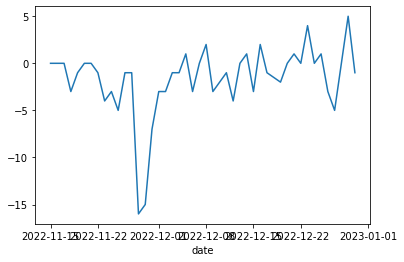

In [16]:
aapl_sentiment.plot()

In [30]:
aapl_sentiment.index = pd.to_datetime(aapl_sentiment.index)

In [37]:
valid_dates_sentiments = aapl_sentiment[aapl_sentiment.index.isin(aapl_prices.index)]

In [33]:
aapl_prices.index

DatetimeIndex(['2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13',
               ...
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-27',
               '2022-12-28', '2022-12-29'],
              dtype='datetime64[ns]', name='Date', length=757, freq=None)

In [41]:
aapl_prices_with_news = aapl_prices.loc[valid_dates_sentiments.index]

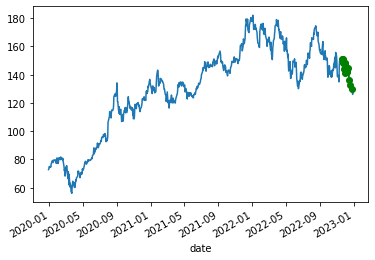

In [47]:
aapl_prices['Close'].plot()
aapl_prices_with_news[valid_dates_sentiments < 0].Close.plot(
    color = 'green',
    marker = 'o'
)

plt.show()